In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import os
from tqdm import tqdm

In [2]:
PRIMUS_PATH = Path('/home/macosta/ttmp/primus-data/primus/')
SAVEPATH = Path('/home/macosta/ttmp/primus-data/leipzig-full/leipzig-png/')
FONT_STANDARDIZED_PATH = Path('/home/macosta/ttmp/primus-leipzig/')
FONT_STANDARDIZED_PATH.mkdir(exist_ok=True)

In [3]:
def mei_generator():
    for package in os.listdir(PRIMUS_PATH):
        package_path = PRIMUS_PATH / package
        for incipit_dir in os.listdir(package_path):
            incipit_dir_path = package_path / incipit_dir
            incipit_files = os.listdir(incipit_dir_path)
            mei_files = [file for file in incipit_files if file[-4:] == '.mei' and file[0] != '.']
            if not mei_files:
                continue
            mei_file = mei_files[0]
            yield incipit_dir_path / mei_file

In [10]:
def engrave(savedir, limit=None):
    f = open('engrave.sh', 'w')
    i = 0
    savedir.mkdir(exist_ok=True)
    for mei_file in tqdm(mei_generator(), total=87678):
        incipit_name = mei_file.name[:-4]
        incipit_savename = savedir / f"{incipit_name}.svg"
        f.write(f'verovio -o {incipit_savename} --footer "none" --adjust-page-height {str(mei_file)}\n')
        f.write(f'rsvg-convert {incipit_savename} > {str(incipit_savename)[:-4]}.png\n')
        i += 1
        if limit is not None and i >= limit:
            break
    f.write('find ' + str(SAVEPATH) + ' -type f -name "*.svg" -exec bash -c \'rm "$0"\' {} \;')
    f.close()

In [11]:
engrave(SAVEPATH, limit=None)

100%|█████████████████████████████████████| 87678/87678 [18:24<00:00, 79.35it/s]


In [2]:
def binarize(directory):
    for image_file in tqdm(os.listdir(directory)):
        image_location = directory / image_file
        try:
            img = Image.open(image_location)
        except:
            os.remove(image_location)
        try:
            arr = np.array(img)[:,:,3]
        except:
            continue
        else:
            arr_binary = np.array(arr > 50, dtype=np.uint8)
            arr_binary = (1 - arr_binary) * 255
            img_binarized = Image.fromarray(arr_binary)
            img_binarized.save(f"{str(image_location)}")

In [6]:
binarize(Path('/home/macosta/ttmp/primus-standardized/'))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 87658/87658 [23:21<00:00, 62.56it/s]


In [79]:
clef_strings = {}

cropped_location = Path('/home/macosta/ttmp/primus-cropped/')
for file in tqdm(os.listdir(cropped_location)):
    img = Image.open(cropped_location / file)
    arr = 1 - np.array(img, dtype=np.uint8)
    empty_staff = arr[:,2]
    n = 5
    long_empty_staff = np.zeros((175, n))
    for i in range(n):
        long_empty_staff[:,i] = empty_staff
    empty_staff_string = ''.join([str(int(x)) for x in empty_staff])
    end = 0
    for i in range(20, arr.shape[1]):
        if np.array_equal(arr[:,i:i+n], long_empty_staff):
            end = i
            break
    assert end != 0
    clef = arr[:,:end]
#     Image.fromarray(clef * 255).show()
    clef_string = ''.join([str(int(x)) for x in clef.T.flatten()])
    while len(clef_string) < 175 * 70:
        clef_string += empty_staff_string
    if clef_string not in clef_strings:
        clef_strings[clef_string] = 1
    else:
        clef_strings[clef_string] += 1

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 87578/87578 [05:32<00:00, 263.60it/s]


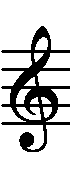

7839


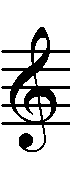

7489


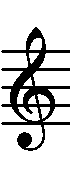

7247


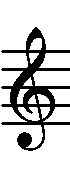

5405


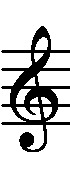

4767


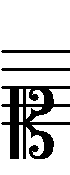

4722


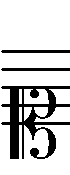

4582


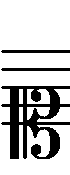

4571


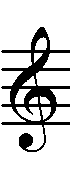

4375


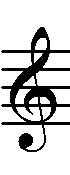

3327


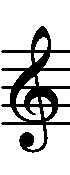

2922


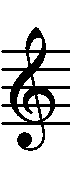

2570


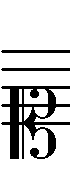

2450


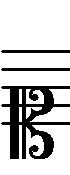

2145


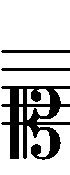

2053


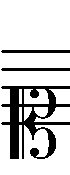

1668


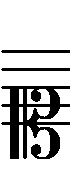

1590


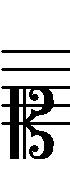

1287


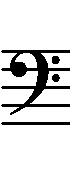

860


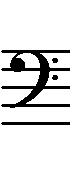

853


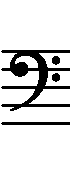

804


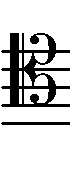

753


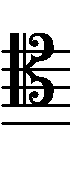

751


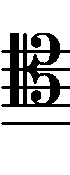

718


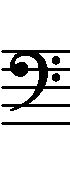

553


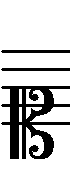

517


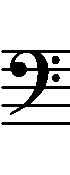

496


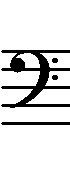

493


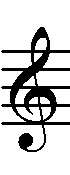

452


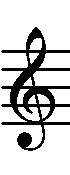

450


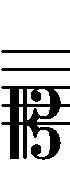

438


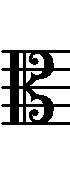

437


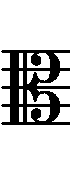

391


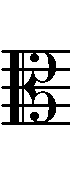

386


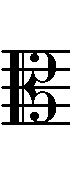

355


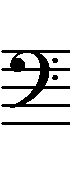

339


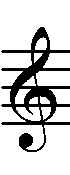

334


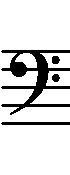

323


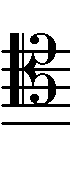

321


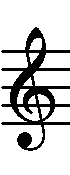

292


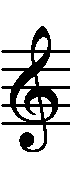

289


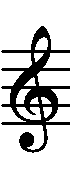

281


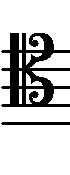

275


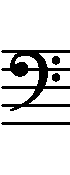

264


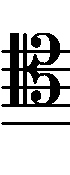

257


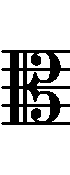

241


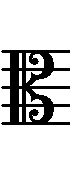

239


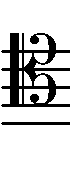

230


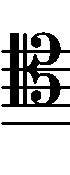

226


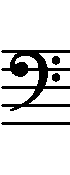

212


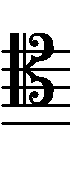

197


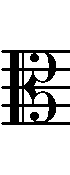

178


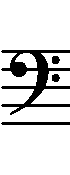

172


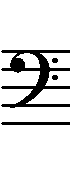

160


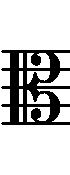

143


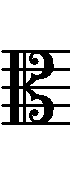

132


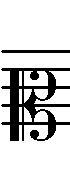

126


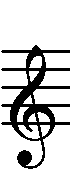

124


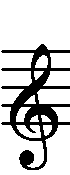

112


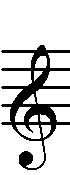

106


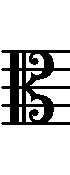

96


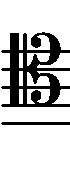

90


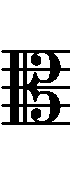

84


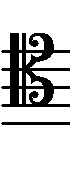

82


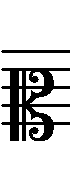

69


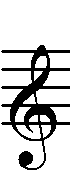

61


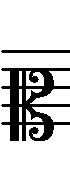

58


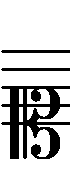

57


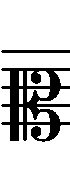

53


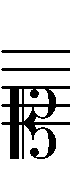

50


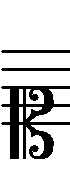

49


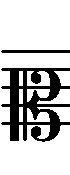

47


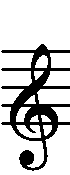

47


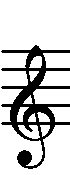

45


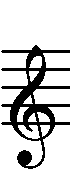

33


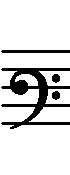

30


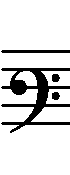

29


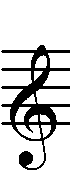

29


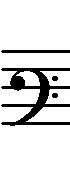

28


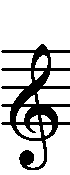

27


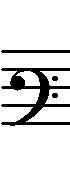

26


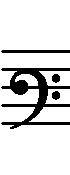

20


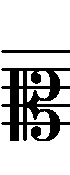

19


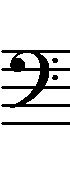

19


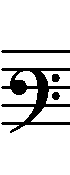

17


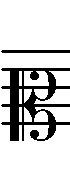

13


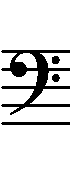

11


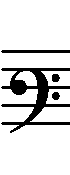

10


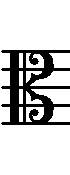

9


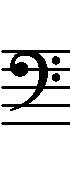

8


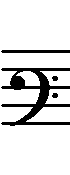

8


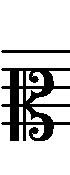

7


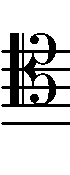

7


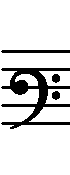

6


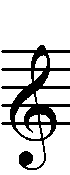

4


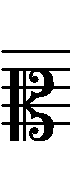

4


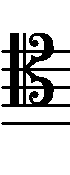

4


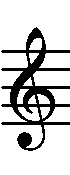

3


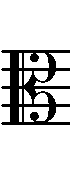

3


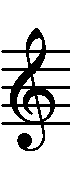

2


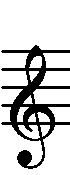

2


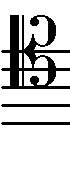

2


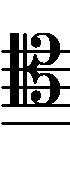

2


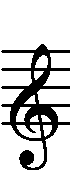

2


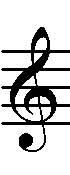

2


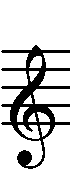

1


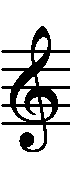

1


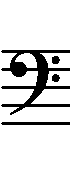

1


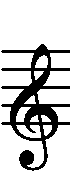

1


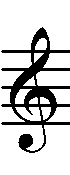

1


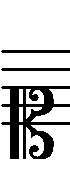

1


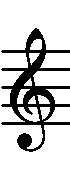

1


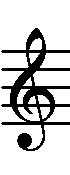

1


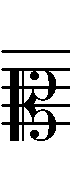

1


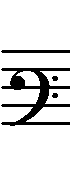

1


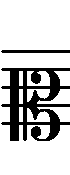

1


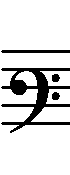

1


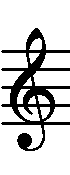

1


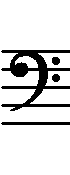

1


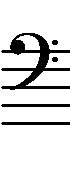

1


In [80]:
clef_frequency = sorted(clef_strings.items(), key=lambda x: -x[1])
for clef, frequency in clef_frequency:
    arr = 1 - np.array([int(x) for x in clef], dtype=np.uint8).reshape((70, 175)).T
    Image.fromarray(arr * 255).show()
    print(frequency)

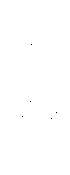

In [101]:
clef_1 = clef_frequency[0][0]
clef_2 = clef_frequency[4][0]
diff = [str(int(x[0] != x[1])) for x in zip(clef_1, clef_2)]
diff = ''.join(diff)
arr = 1 - np.array([int(x) for x in diff], dtype=np.uint8).reshape((70, 175)).T
Image.fromarray(arr * 255).show()

In [83]:
FONTS = ["bravura","leipzig","gootville","gootville","bravura","leipzig","gootville","bravura","leipzig","leipzig","bravura","gootville","gootville","leipzig","bravura","gootville","bravura","leipzig","bravura","gootville","leipzig","gootville","leipzig","bravura","leipzig","leipzig","bravura","gootville","leipzig","gootville","bravura","leipzig","bravura","gootville","gootville","gootville","leipzig","bravura","gootville","gootville","bravura","bravura","leipzig","leipzig","bravura","bravura","leipzig","gootville","bravura","leipzig","leipzig","gootville","bravura","gootville","bravura","leipzig","gootville","gootville","bravura","leipzig","leipzig","bravura","bravura","leipzig","leipzig","leipzig","leipzig","bravura","bravura","gootville","leipzig","bravura","bravura","gootville","gootville","leipzig","bravura","leipzig","gootville","bravura","gootville","leipzig","bravura","gootville","bravura","gootville","bravura","bravura","leipzig","leipzig","gootville","leipzig","gootville","leipzig","leipzig","leipzig","gootville","gootville","gootville","gootville","gootville","gootville","bravura","bravura","leipzig","gootville","bravura","bravura","bravura","leipzig","leipzig","gootville","gootville","gootville","gootville","bravura","bravura","gootville","leipzig","gootville"]

In [87]:
clef_to_font = {k[0]: v for k, v in zip(clef_frequency, FONTS)}

In [94]:
cropped_location = Path('/home/macosta/ttmp/primus-cropped/')
for file in tqdm(os.listdir(cropped_location)):
    img = Image.open(cropped_location / file)
    arr = 1 - np.array(img, dtype=np.uint8)
    empty_staff = arr[:,2]
    n = 5
    long_empty_staff = np.zeros((175, n))
    for i in range(n):
        long_empty_staff[:,i] = empty_staff
    empty_staff_string = ''.join([str(int(x)) for x in empty_staff])
    end = 0
    for i in range(20, arr.shape[1]):
        if np.array_equal(arr[:,i:i+n], long_empty_staff):
            end = i
            break
    assert end != 0
    clef = arr[:,:end]
#     Image.fromarray(clef * 255).show()
    clef_string = ''.join([str(int(x)) for x in clef.T.flatten()])
    while len(clef_string) < 175 * 70:
        clef_string += empty_staff_string
    if clef_to_font[clef_string] == 'leipzig':
        savepath = FONT_STANDARDIZED_PATH / file
        img.save(savepath)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 87578/87578 [05:52<00:00, 248.56it/s]
